In [1]:
import qiskit as qs
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
qasm_simulator = qs.Aer.get_backend("qasm_simulator")

In [21]:
output_file_path = "output.csv"

In [3]:
def get_light_source_circuit(initial_state = [0. + 1.j/math.sqrt(2), 1/math.sqrt(2) + 0.j]):
    light_source_circuit = qs.QuantumCircuit(1, name="light_source")
    light_source_circuit.initialize(initial_state, 0)
    # print(light_source_circuit.draw())
    return light_source_circuit.to_instruction()

In [4]:
def get_x_polarizer_circuit():
    x_polarizer_circuit = qs.QuantumCircuit(2, 1, name="x_pol")
    x_polarizer_circuit.measure(1, 0)
    x_polarizer_circuit.cx(1, 0) 
    # print(x_polarizer_circuit.draw())
    return x_polarizer_circuit.to_instruction()

In [5]:
def get_alpha_polarizer_circuit(alpha = math.pi/4):
    alpha_polarizer_circuit = qs.QuantumCircuit(3, 1, name="alpha_pol")
    alpha_polarizer_circuit.ch(0, 1)
    alpha_polarizer_circuit.crz(alpha*2, 0, 1)
    alpha_polarizer_circuit.ch(0, 1)

    alpha_polarizer_circuit.measure(1, 0)
    alpha_polarizer_circuit.cx(1, 0)

    alpha_polarizer_circuit.ch(0, 2)
    alpha_polarizer_circuit.crz(alpha*2, 0, 2)
    alpha_polarizer_circuit.ch(0, 2)

    # print(alpha_polarizer_circuit.draw())
    return alpha_polarizer_circuit.to_instruction()


In [6]:
def get_y_polarizer_circuit():
    y_polarizer_circuit = qs.QuantumCircuit(2, 1, name="y_pol")
    y_polarizer_circuit.cx(0, 1)
    y_polarizer_circuit.measure(1, 0)
    y_polarizer_circuit.cx(1, 0)
    # print(y_polarizer_circuit.draw())
    return y_polarizer_circuit.to_instruction()

In [7]:
def get_final_measurement_circuit():
    final_measurement_circuit = qs.QuantumCircuit(2, 1, name="final_meas")
    final_measurement_circuit.cx(0, 1)
    final_measurement_circuit.measure(1, 0)
    # print(final_measurement_circuit.draw())
    return final_measurement_circuit.to_instruction()

In [12]:
polarizer_simulator_circuit = qs.QuantumCircuit(5, 4)
polarizer_simulator_circuit.append(get_light_source_circuit(), [1])
polarizer_simulator_circuit.append(get_x_polarizer_circuit(), [0, 1], [0])
polarizer_simulator_circuit.append(get_alpha_polarizer_circuit(alpha = math.pi/3), [0, 2, 3], [1])
polarizer_simulator_circuit.append(get_y_polarizer_circuit(), [0, 3], [2])
polarizer_simulator_circuit.append(get_final_measurement_circuit(), [0, 4], [3])


In [13]:
polarizer_simulator_circuit.draw()

┌────────┐┌────────────┐┌────────┐┌─────────────┐
q_0: ────────────────┤0       ├┤0           ├┤0       ├┤0            ├
     ┌──────────────┐│        ││            ││        ││             │
q_1: ┤ light_source ├┤1       ├┤            ├┤        ├┤             ├
     └──────────────┘│        ││            ││        ││             │
q_2: ────────────────┤        ├┤1           ├┤        ├┤             ├
                     │  x_pol ││            ││        ││             │
q_3: ────────────────┤        ├┤2 alpha_pol ├┤1       ├┤             ├
                     │        ││            ││  y_pol ││             │
q_4: ────────────────┤        ├┤            ├┤        ├┤1 final_meas ├
                     │        ││            ││        ││             │
c_0: ════════════════╡0       ╞╡            ╞╡        ╞╡             ╞
                     └────────┘│            ││        ││             │
c_1: ══════════════════════════╡0           ╞╡        ╞╡             ╞
                               └────────────┘│        ││             │
c_2: ════════════════════════════════════════╡0       ╞╡             ╞
                                             └────────┘│             │
c_3: ══════════════════════════════════════════════════╡0            ╞
                                                       └─────────────┘

In [14]:
result_1 = qs.execute(polarizer_simulator_circuit, qasm_simulator, shots=10000).result()

In [15]:
result_1.get_counts()["1001"]

941

In [16]:
results = []
for i in range(1, 181):
    # print(i)
    polarizer_simulator_circuit = qs.QuantumCircuit(5, 4)
    polarizer_simulator_circuit.append(get_light_source_circuit(), [1])
    polarizer_simulator_circuit.append(get_x_polarizer_circuit(), [0, 1], [0])

    polarizer_simulator_circuit.append(get_alpha_polarizer_circuit(alpha = i * math.pi / 180), [0, 2, 3], [1])
    polarizer_simulator_circuit.append(get_y_polarizer_circuit(), [0, 3], [2])
    polarizer_simulator_circuit.append(get_final_measurement_circuit(), [0, 4], [3])
    result_1 = qs.execute(polarizer_simulator_circuit, qasm_simulator, shots=10000).result()
    if "1001" in result_1.get_counts():
        results.append({
            "alpha": i,
            "count": result_1.get_counts()["1001"]
        })
    else:
        results.append({
            "alpha": i,
            "count": 0
        })


In [18]:
dataframe = pd.DataFrame(results)

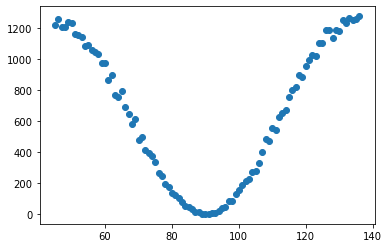

In [19]:
plt.scatter(dataframe["alpha"][44:136], dataframe["count"][44:136])

In [22]:
dataframe.to_csv(output_file_path, index=False)